# Convolutional Neural Networks

In this notebook, we train an MLP to classify images from the MNIST database.
# 1. Load MNIST Database

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print (X_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 2. Visualize the First Six Training Images

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

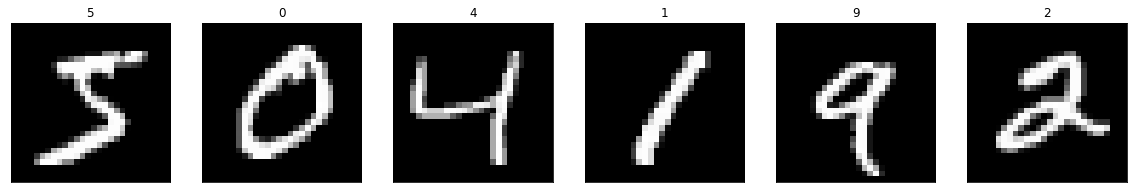

In [5]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(str(y_train[i]))

# 3. View an Image in More Detail

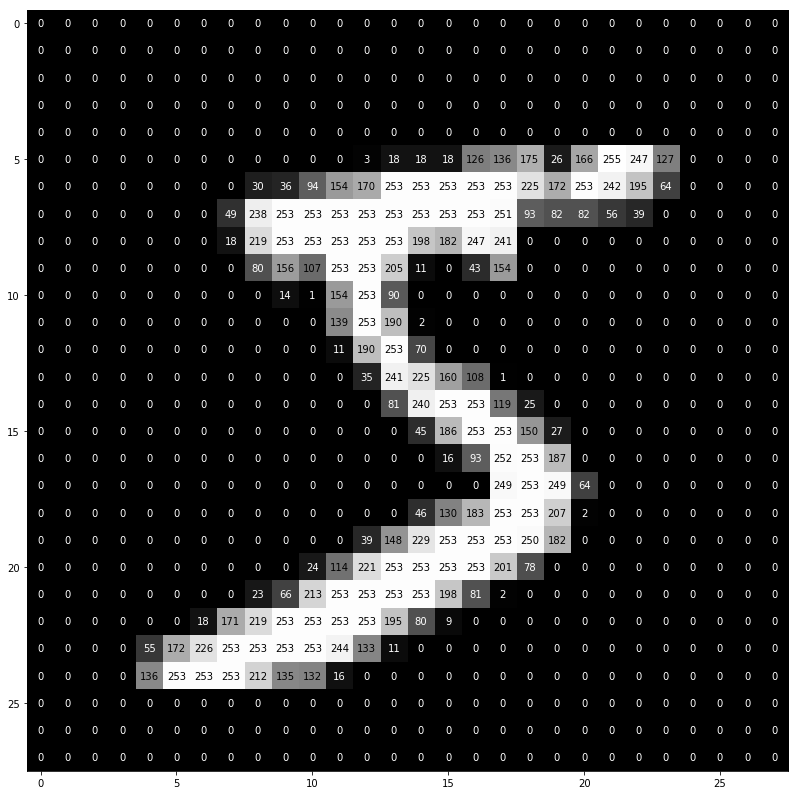

In [6]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (14,14)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

# 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [7]:
#rescale input to 0 to 1
x_train = X_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [8]:
from keras.utils import np_utils
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


# 6. Define the Model Architecture

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Dropout

In [10]:
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# 7. Complie the Model

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [12]:
score=model.evaluate(x_test,y_test,verbose=0)
accuracy = score[1]*100

In [13]:
print('Test accuracy is : %.4f%%' % accuracy)

Test accuracy is : 5.9400%


In [14]:
hist = model.fit(x_train,y_train,batch_size=10000,epochs=10,shuffle=True,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s - loss: 1.6381 - acc: 0.4776 - val_loss: 1.1625 - val_acc: 0.5977
Epoch 2/10
48000/48000 [==============================] - 9s - loss: 0.8037 - acc: 0.7623 - val_loss: 0.4768 - val_acc: 0.8550
Epoch 3/10
48000/48000 [==============================] - 9s - loss: 0.5918 - acc: 0.8187 - val_

In [15]:
score=model.evaluate(x_test,y_test,verbose=0)
accuracy = score[1]*100

In [16]:
print('Test accuracy is : %.4f%%' % accuracy)

Test accuracy is : 93.5800%
